<a href="https://www.kaggle.com/code/chandanarprasad/analysis-of-harry-potter-books?scriptVersionId=98710377" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

In [2]:
#Reading .txt data into a variable
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [3]:
#Calling function to read the data
book1 = read_book('../input/harry-potter-books-corpora-part-1-7/Book1.txt')
book2 = read_book('../input/harry-potter-books-corpora-part-1-7/Book2.txt')
book3 = read_book('../input/harry-potter-books-corpora-part-1-7/Book3.txt')
book4 = read_book('../input/harry-potter-books-corpora-part-1-7/Book4.txt')
book5 = read_book('../input/harry-potter-books-corpora-part-1-7/Book5.txt')
book6 = read_book('../input/harry-potter-books-corpora-part-1-7/Book6.txt')
book7 = read_book('../input/harry-potter-books-corpora-part-1-7/Book7.txt')

character_list = pd.read_csv('../input/harry-potter-books-corpora-part-1-7/characters_list.csv')

In [4]:
#Length of books
len(book1), len(book2), len(book3), len(book4), len(book5), len(book6), len(book7)

(459169, 514948, 655473, 1149706, 1559298, 1026630, 1188915)

In [5]:
character_list.shape

(65, 3)

In [6]:
#Converting text to lower case and removing punctuations and special characters.
book1 = book1.lower()
book1 = ' '.join([word for word in book1.split() if word.isalnum()])
book2 = book2.lower()
book2 = ' '.join([word for word in book2.split() if word.isalnum()])
book3 = book3.lower()
book3 = ' '.join([word for word in book3.split() if word.isalnum()])
book4 = book4.lower()
book4 = ' '.join([word for word in book4.split() if word.isalnum()])
book5 = book5.lower()
book5 = ' '.join([word for word in book5.split() if word.isalnum()])
book6 = book6.lower()
book6 = ' '.join([word for word in book6.split() if word.isalnum()])
book7 = book7.lower()
book7 = ' '.join([word for word in book7.split() if word.isalnum()])

In [7]:
#Default English Stopwords
stopwords = nltk.corpus.stopwords.words('english')

#Defining context specific stopwords
STOPWORDS = ["harry","potter","hermione","ron","j","k","rowling","s","t","said","page","professor","know","back","i","j.k","like","could",'would']
stopwords = stopwords +list(STOPWORDS)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [8]:
book1_tf = ' '.join([word for word in book1.split() if word not in stopwords])
book2_tf = ' '.join([word for word in book2.split() if word not in stopwords])
book3_tf = ' '.join([word for word in book3.split() if word not in stopwords])
book4_tf = ' '.join([word for word in book4.split() if word not in stopwords])
book5_tf = ' '.join([word for word in book5.split() if word not in stopwords])
book6_tf = ' '.join([word for word in book6.split() if word not in stopwords])
book7_tf = ' '.join([word for word in book7.split() if word not in stopwords])

In [9]:
#Most common term frequenices - top 20 for each book
book1_tf = Counter(book1_tf.split()).most_common(20)
book2_tf = Counter(book2_tf.split()).most_common(20)
book3_tf = Counter(book3_tf.split()).most_common(20)
book4_tf = Counter(book4_tf.split()).most_common(20)
book5_tf = Counter(book5_tf.split()).most_common(20)
book6_tf = Counter(book6_tf.split()).most_common(20)
book7_tf = Counter(book7_tf.split()).most_common(20)

print(book1_tf)
print('\n')
print(book2_tf)
print('\n')
print(book3_tf)
print('\n')
print(book4_tf)
print('\n')
print(book5_tf)
print('\n')
print(book6_tf)
print('\n')
print(book7_tf)
print('\n')

[('stone', 389), ('philosophers', 347), ('one', 212), ('hagrid', 210), ('got', 186), ('get', 186), ('looked', 167), ('see', 142), ('going', 128), ('around', 122), ('uncle', 119), ('think', 117), ('never', 114), ('snape', 113), ('even', 102), ('something', 101), ('dudley', 96), ('look', 96), ('looking', 95), ('told', 92)]


[('chamber', 452), ('secrets', 401), ('got', 180), ('one', 179), ('looked', 154), ('around', 142), ('think', 136), ('lockhart', 136), ('get', 124), ('see', 123), ('looking', 115), ('still', 114), ('malfoy', 113), ('eyes', 112), ('go', 111), ('never', 108), ('though', 101), ('going', 99), ('weasley', 95), ('look', 93)]


[('azkaban', 512), ('prisoner', 488), ('one', 241), ('looked', 241), ('black', 223), ('lupin', 216), ('got', 211), ('around', 198), ('see', 180), ('get', 176), ('still', 172), ('looking', 165), ('going', 156), ('though', 153), ('snape', 144), ('think', 142), ('eyes', 134), ('saw', 134), ('toward', 132), ('go', 121)]


[('fire', 861), ('goblet', 860), 

In [10]:
character_list.bio = character_list.bio.astype('string')
character_list.name = character_list.name.astype('string')
character_list.bio = character_list.bio.str.lower()
character_list.name = character_list.name.str.lower()
character_list.drop(columns=['id'],inplace=True)
character_list.head()

,name,bio
0,regulus arcturus black,brother of sirius. used to be a death eater bu...
1,sirius black,best friend of james potter and godfather of h...
2,lavender brown,killed by a werewolf. she was a gryffindor stu...
3,cho chang,ravenclaw student who dated cedric diggory and...
4,vincent crabbe sr.,father of crabbe and death-eater who escaped a...


In [11]:
#Character list where "father" is used in the bio for description
character_list[character_list['bio'].str.contains("father")]['name']

1             sirius black
4       vincent crabbe sr.
19               goyle sr.
27        frank longbottom
30    xenophilius lovegood
33           lucius malfoy
40            james potter
43          tom riddle sr.
50          arthur weasley
Name: name, dtype: string

In [12]:
#Character list where "mother" is used in the bio for description
character_list[character_list['bio'].str.contains("mother")]['name']

26    alice longbottom
34     narcissa malfoy
41         lily potter
44         mary riddle
56       molly weasley
Name: name, dtype: string

In [13]:
#Character list where "potter" is used in the bio for description
character_list[character_list['bio'].str.contains("potter")]['name']

1        sirius black
3           cho chang
31        remus lupin
38    peter pettigrew
55      ginny weasley
Name: name, dtype: string

In [14]:
#Character list where "ravenclaw" is used in the bio for description
character_list[character_list['bio'].str.contains("ravenclaw")]['name']

3         cho chang
29    luna lovegood
Name: name, dtype: string

In [15]:
#Character list where "weasley" is used in the bio for description
character_list[character_list['bio'].str.contains("weasley")]['name']

8          fleur delacour
21       hermione granger
25    bellatrix lestrange
50         arthur weasley
53           fred weasley
54         george weasley
56          molly weasley
Name: name, dtype: string

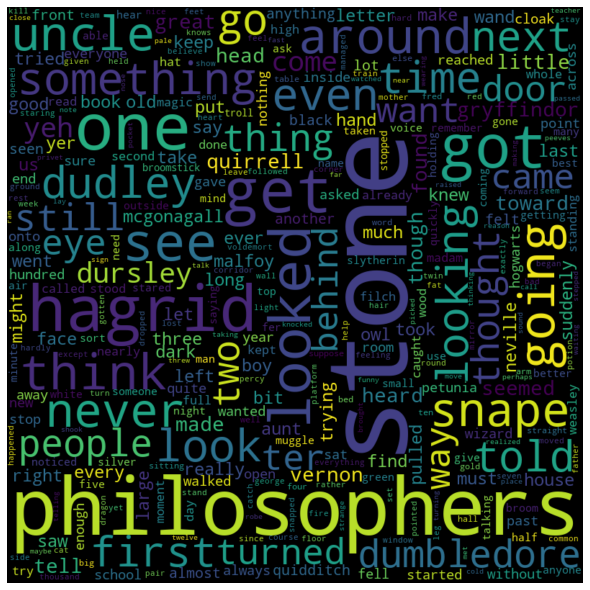

In [16]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book1)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

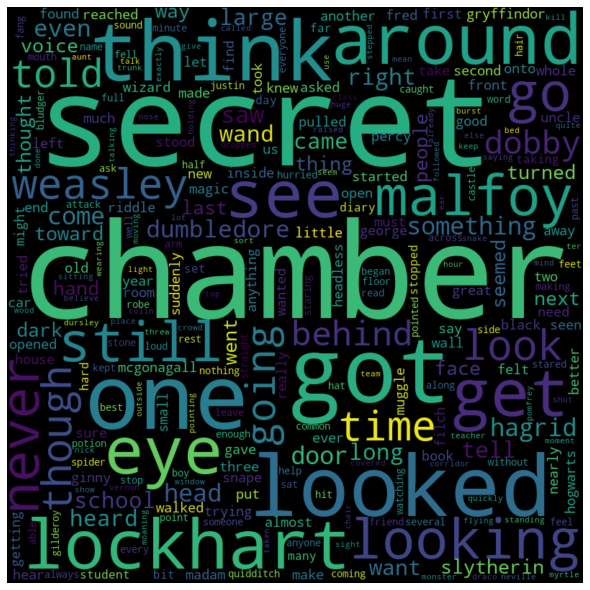

In [17]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book2)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

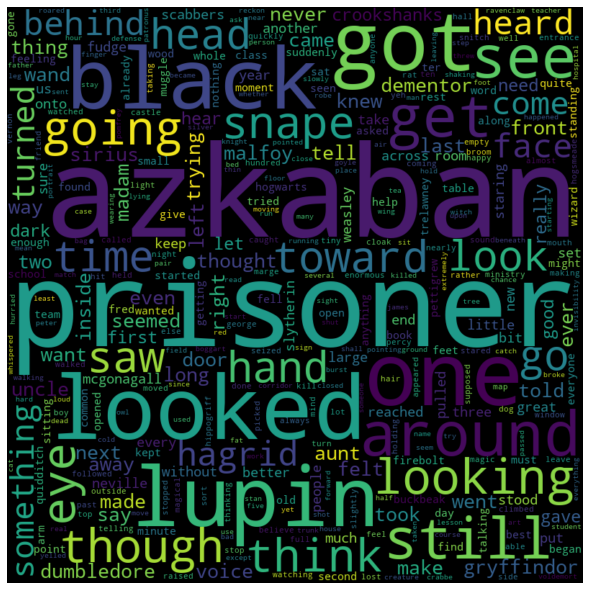

In [18]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book3)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

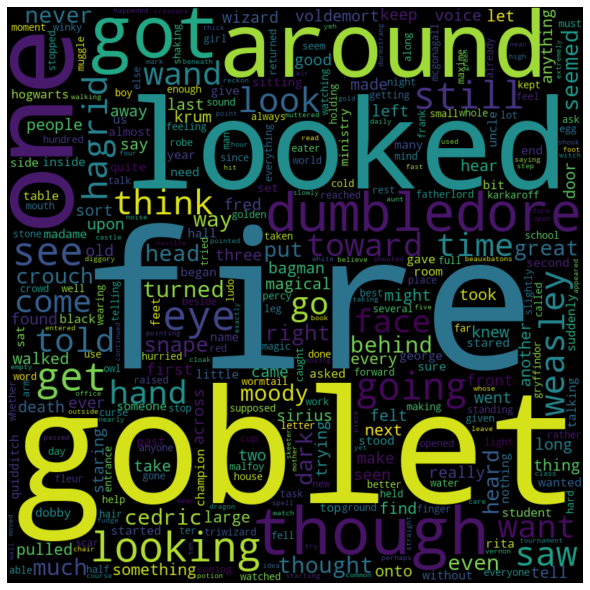

In [19]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book4)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

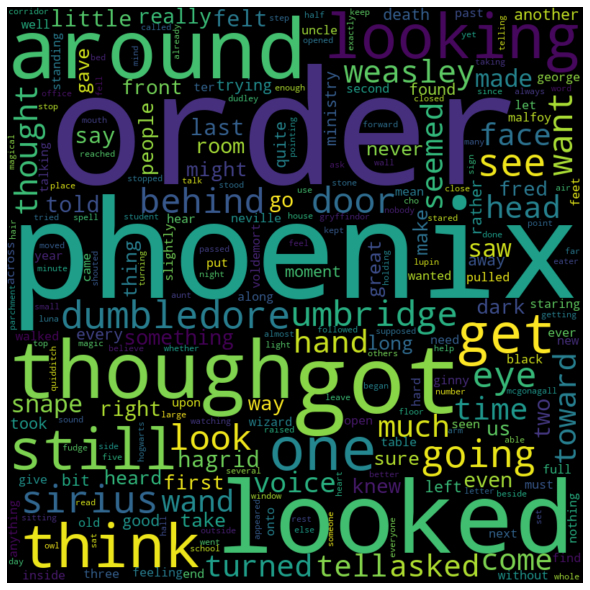

In [20]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,collocations=False).generate(book5)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

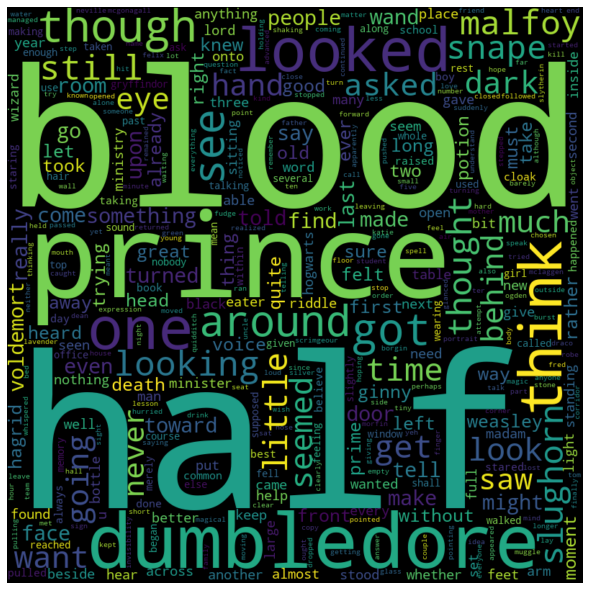

In [21]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book6)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

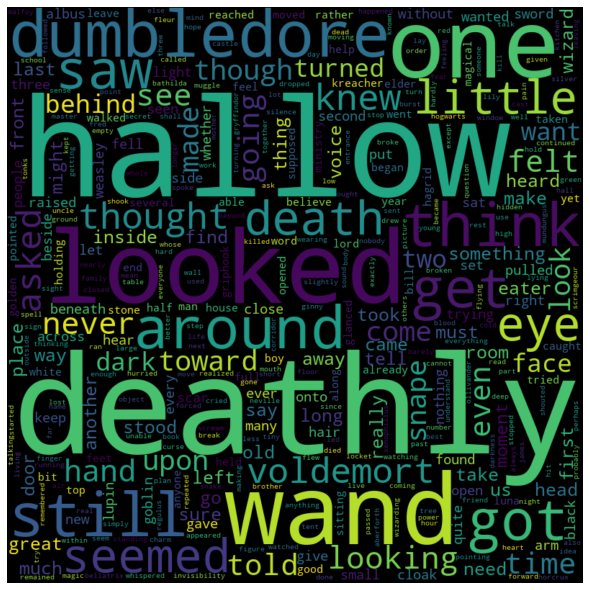

In [22]:
wordcloud = WordCloud(width = 800, height = 800, 
                      background_color = 'black',
                      stopwords = stopwords, 
                      min_font_size = 10,
                     max_words=1000,
                     collocations=False).generate(book7)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()